In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import zscore
import math

In [22]:
df=pd.read_csv("flight price test.csv")

In [23]:
df1=pd.read_csv("Copy of Data_Train.csv")

In [24]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,07-06-2022 04:25,10h 55m,1 stop,No info
1,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,22-05-2022 19:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,25-06-2022 02:45,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,07-06-2022 20:25,23h 55m,1 stop,No info
2667,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,07-03-2022 04:25,6h 35m,1 stop,No info
2669,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [25]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [27]:
#describe about the data
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [28]:
df1.shape

(10683, 11)

In [29]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [30]:
#drop the nullvalues
df1.dropna(inplace=True)

In [31]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [32]:
df.dtypes # datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [33]:
#The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.
#dt.day method will extract only day of that date
#dt.month method will extract only month of that date

In [34]:
def change_into_datetime(col):
    df1[col]=pd.to_datetime(df1[col])

In [35]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [36]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [37]:
df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [38]:
df1['journey_day']=df1['Date_of_Journey'].dt.day
df1['journey_month']=df1['Date_of_Journey'].dt.month


In [39]:
df1.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-31 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-31 05:50:00,2022-07-31 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-31 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-07-31 18:05:00,2022-07-31 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-07-31 16:50:00,2022-07-31 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2022-07-31 09:00:00,2022-07-31 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-07-31 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2022-07-31 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-07-31 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2022-07-31 11:25:00,2022-07-31 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [40]:
df1.drop('Date_of_Journey', axis=1, inplace=True)

In [41]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [42]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df1,'Dep_Time')

#extracting minutes
extract_min(df1,'Dep_Time')

#drop the column
drop_col(df1,'Dep_Time')

In [43]:
#extracting hour
extract_hour(df1,'Arrival_Time')

#extracting min
extract_min(df1,'Arrival_Time')


#drop the column
drop_col(df1,'Arrival_Time')

In [44]:
df1.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


In [45]:
duration=list(df1['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [46]:
df1['Duration']=duration

In [47]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [48]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [49]:
df1['dur_hour']=df1['Duration'].apply(hour)

In [50]:
df1['dur_min']=df1['Duration'].apply(minutes)

In [51]:
df1.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [52]:
drop_col(df1,'Duration')

In [53]:
df1.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [54]:
df1['dur_hour'] = df1['dur_hour'].astype(int)
df1['dur_min'] = df1['dur_min'].astype(int)

In [55]:
df1.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

In [56]:
column=[column for column in df1.columns if df1[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [57]:
continuous_col =[column for column in df1.columns if df1[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [58]:
categorical = df1[column]

In [59]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [60]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

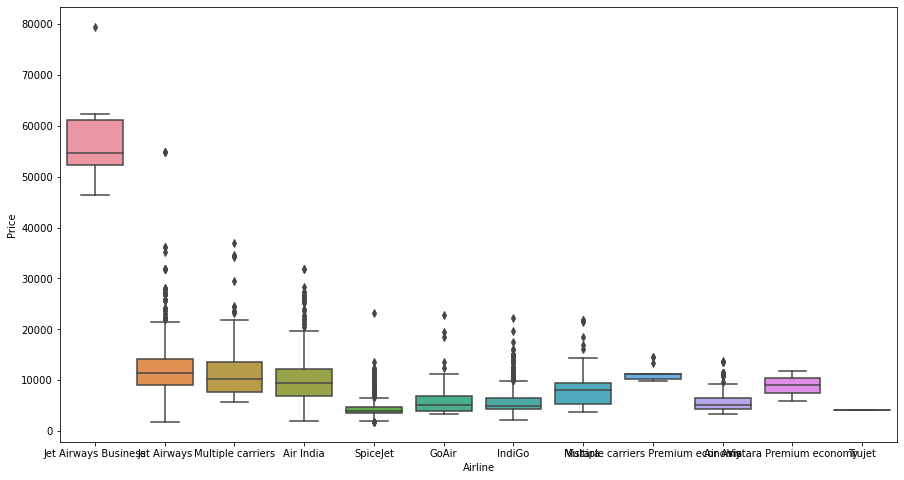

In [61]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df1.sort_values('Price',ascending=False))

In [62]:
#From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

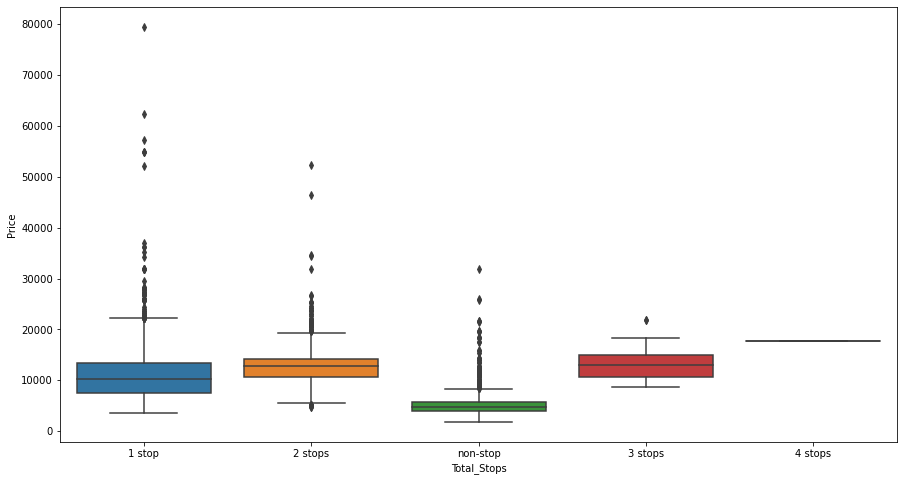

In [63]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df1.sort_values('Price',ascending=False))

In [64]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [65]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [66]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x1080 with 0 Axes>

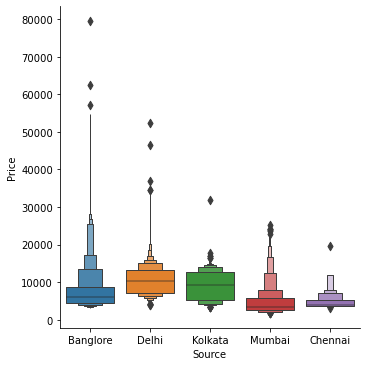

In [67]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df1.sort_values('Price',ascending=False),kind='boxen')

In [68]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [69]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

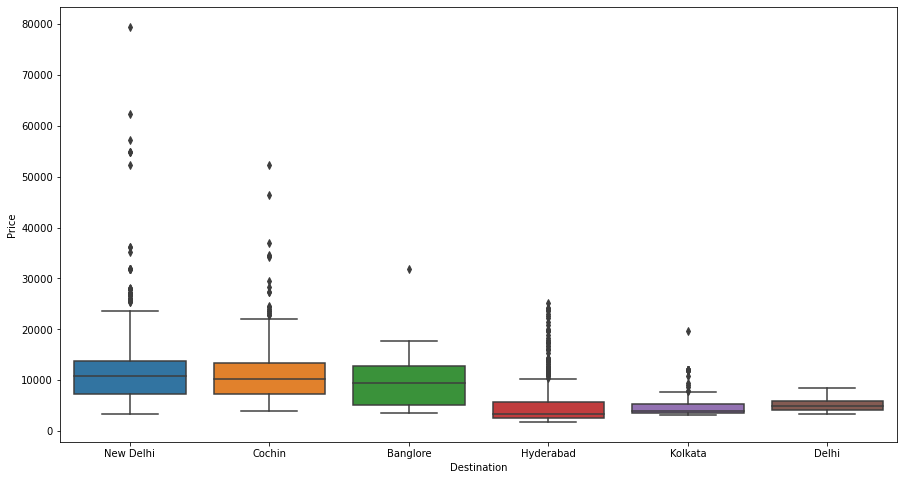

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df1.sort_values('Price',ascending=False))

In [71]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [72]:
# now work on route column
categorical['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
CCU → RPR → HYD → BLR             1
BOM → JLR → HYD                   1
BOM → BLR → CCU → BBI → HYD       1
CCU → IXZ → MAA → BLR             1
Name: Route, Length: 128, dtype: int64

In [73]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [74]:
drop_col(categorical,'Route')

In [75]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [76]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [77]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [78]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [79]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

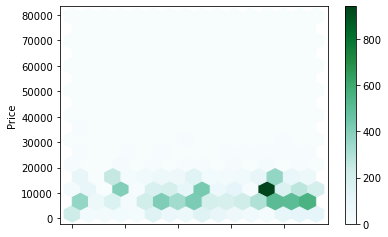

In [80]:
df1.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [81]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [82]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [83]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [84]:
drop_col(categorical,'Additional_Info')

In [85]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [86]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [87]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [88]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

In [89]:
final_df1=pd.concat([categorical,Airline,source,destination,df1[continuous_col]],axis=1)

In [90]:
final_df1.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [91]:
pd.set_option('display.max_columns',33)
final_df1.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [92]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

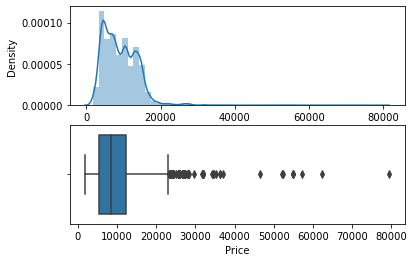

In [93]:
plot(final_df1,'Price')

In [94]:
final_df1['Price']=np.where(final_df1['Price']>=40000,final_df1['Price'].median(),final_df1['Price'])

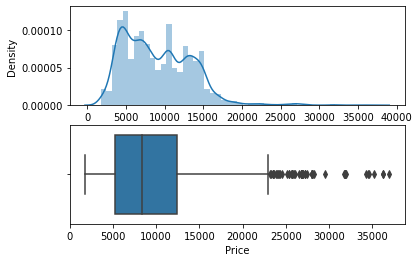

In [95]:
plot(final_df1,'Price')

In [96]:
X=final_df1.drop('Price',axis=1)
y=df1['Price']

In [97]:
from sklearn.feature_selection import mutual_info_classif

In [98]:
mutual_info_classif(X,y)

array([2.16151443e+00, 2.06458008e+00, 2.73170825e+00, 2.32204299e+00,
       1.49130255e+00, 7.60032018e-01, 7.58300238e-01, 1.09296362e-01,
       6.73410434e-01, 9.39461036e-01, 0.00000000e+00, 5.75806558e-01,
       1.05643865e-03, 3.30452933e-01, 2.46014524e-04, 2.13145473e-01,
       9.33110510e-03, 1.68785130e-01, 1.55678709e+00, 8.86604919e-01,
       2.83942144e-01, 1.53012209e+00, 4.13053090e-01, 2.85760053e-01,
       1.68055764e-01, 3.71554251e-01, 1.09863894e+00, 8.24968882e-01,
       1.45666528e+00, 1.21031475e+00, 1.84781149e+00, 1.55281199e+00,
       1.75977842e+00, 1.08465375e+00])

In [99]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.174281
Route1,2.049927
Route2,2.809545
Route3,2.356443
Route4,1.455318
Route5,0.700479
Air India,0.775140
GoAir,0.111971
IndiGo,0.661022
Jet Airways,0.911682


In [100]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.809545
Route3,2.356443
Total_Stops,2.174281
Route1,2.049927
Arrival_Time_hour,1.829484
dur_hour,1.788445
Arrival_Time_min,1.548045
Delhi,1.528138
Cochin,1.493358
Route4,1.455318


In [101]:
#As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing i

In [102]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [103]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9521022705411897
Predictions are: [ 8693.125      16937.26666667 13841.86166667 ...  3817.4
  5570.26       10448.489     ]


r2 score is: 0.8385563520757042
MAE:1092.4450622455588
MSE:3108706.827626784
RMSE:1763.1525253439602


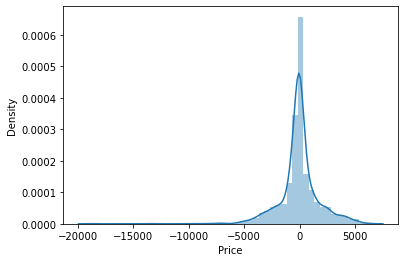

In [105]:
predict(RandomForestRegressor())

Model is: LogisticRegression()
Training score: 0.3356348741954359
Predictions are: [14571 15237 10844 ...  4226  7408 10262]


r2 score is: 0.44250914423182064
MAE:1872.6485727655593
MSE:10734864.158165652
RMSE:3276.4102548621186


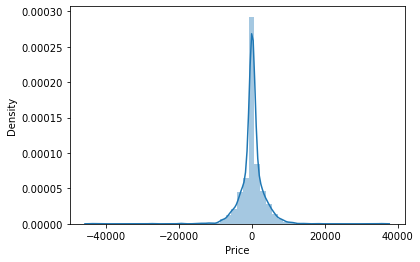

In [106]:
predict(LogisticRegression())

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 17024. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.736091603587893
MAE:1259.2126813289658
MSE:5081734.9851947175
RMSE:2254.2703886612


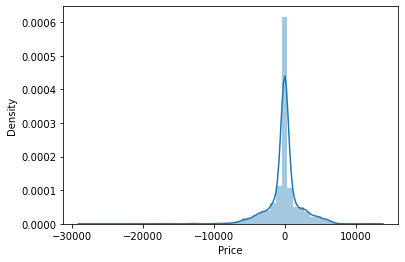

In [107]:
predict(DecisionTreeRegressor())

Model is: KNeighborsRegressor()
Training score: 0.746380546942052
Predictions are: [10401.2 16362.4 12933.2 ...  4210.   9073.  11232.4]


r2 score is: 0.6544658783016435
MAE:1700.4507253158633
MSE:6653493.631445953
RMSE:2579.436688784191


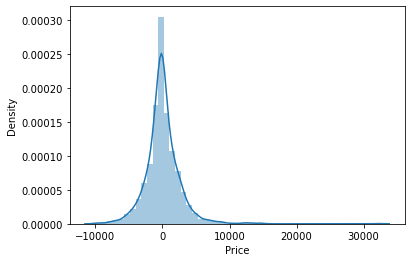

In [108]:
predict(KNeighborsRegressor())

Model is: SVR()
Training score: 0.036808067930953814
Predictions are: [8527.74272429 8268.96331405 8459.17514562 ... 8292.53786893 8453.81861376
 8538.60587913]


r2 score is: 0.05252926427324878
MAE:3327.7462262427184
MSE:18244190.9793285
RMSE:4271.321924103649


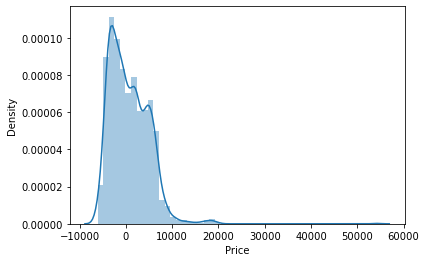

In [109]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.8004872305794601
Predictions are: [ 5702.86974497 17826.76035345 12133.74946613 ...  4547.37535805
  6959.32889786 11428.58468176]


r2 score is: 0.8168066808138467
MAE:1397.4372379678573
MSE:3527511.484358028
RMSE:1878.167054433132


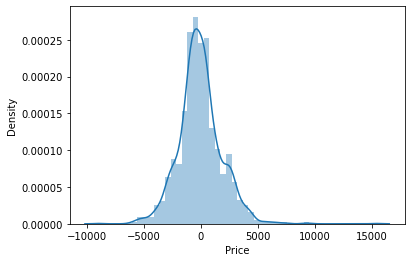

In [110]:
predict(GradientBoostingRegressor())

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [113]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 15}

In [114]:
# best parameter
rf_random.best_params_


{'n_estimators': 220, 'max_features': 'auto', 'max_depth': 15}

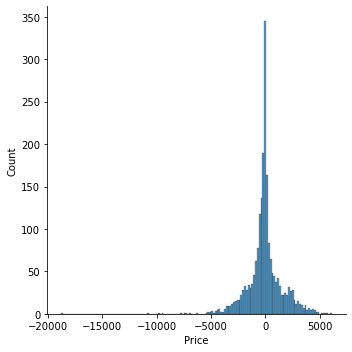

In [115]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [116]:
r2_score(y_test,prediction)

0.8611335291419335